In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
import json

file = 'filtered_otomoto.json'
with open(file) as datafile:
    dataset = json.load(datafile)

dataframe = pd.DataFrame.from_dict(dataset)
dataframe = dataframe.filter(['brand', 'mileage', 'price', 'production_year'])
dataframe = dataframe.dropna()
dataframe[['mileage', 'production_year']] = dataframe[['mileage', 'production_year']].astype(int)
dataframe = dataframe.sort_values(['brand', 'production_year'])

brands = dataframe['brand'].unique().tolist()

brand_threshold = 3000
final_dataframes = {}

for brand in brands:
    brand_dataframe = dataframe.loc[dataframe.brand==brand]
    if brand_dataframe.shape[0] > brand_threshold:
        final_dataframes[brand] = brand_dataframe[['mileage', 'production_year', 'price']]


<Figure size 432x288 with 0 Axes>

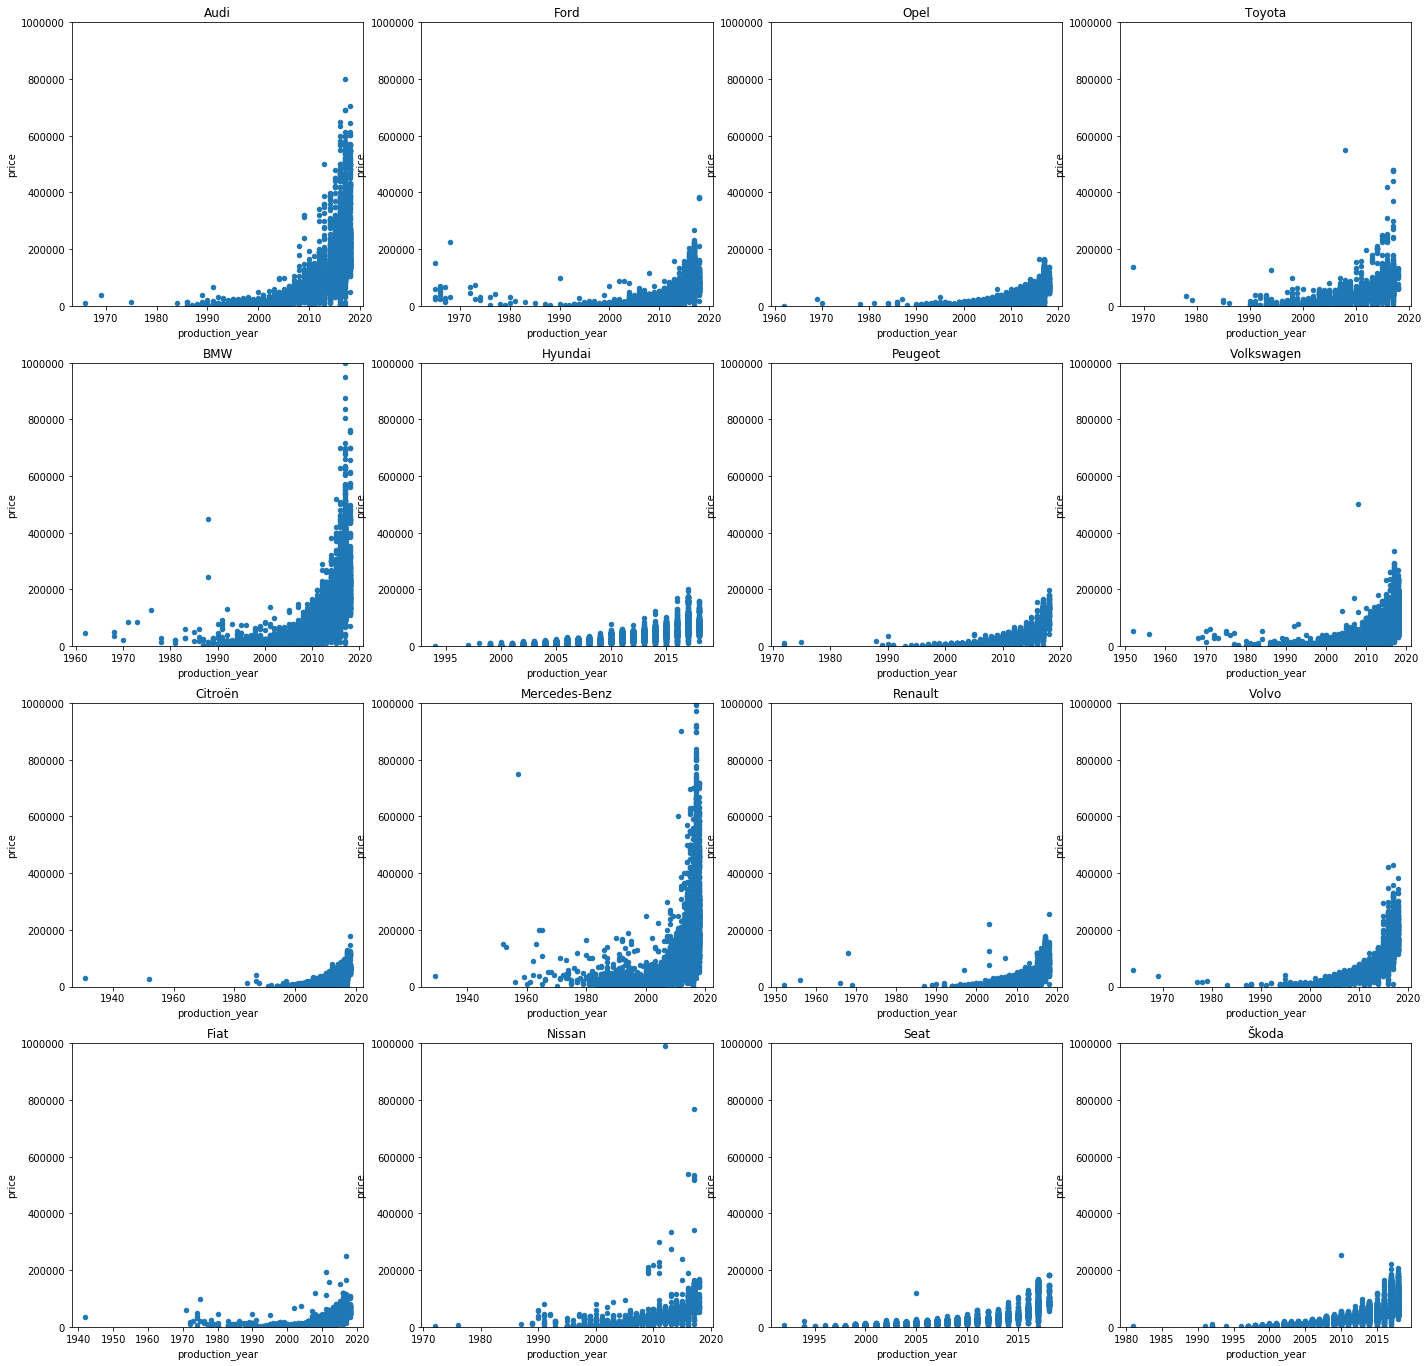

In [10]:
plt.viridis()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24,24), facecolor='w')
for index, (brand, brand_dataframe) in enumerate(final_dataframes.items()):
    ax = brand_dataframe.plot.scatter(x='production_year', y='price', ax=axes[index%4][index//4])
    ax.set_ylim([0, 1e6])
    ax.set_title(brand)
                


<Figure size 432x288 with 0 Axes>

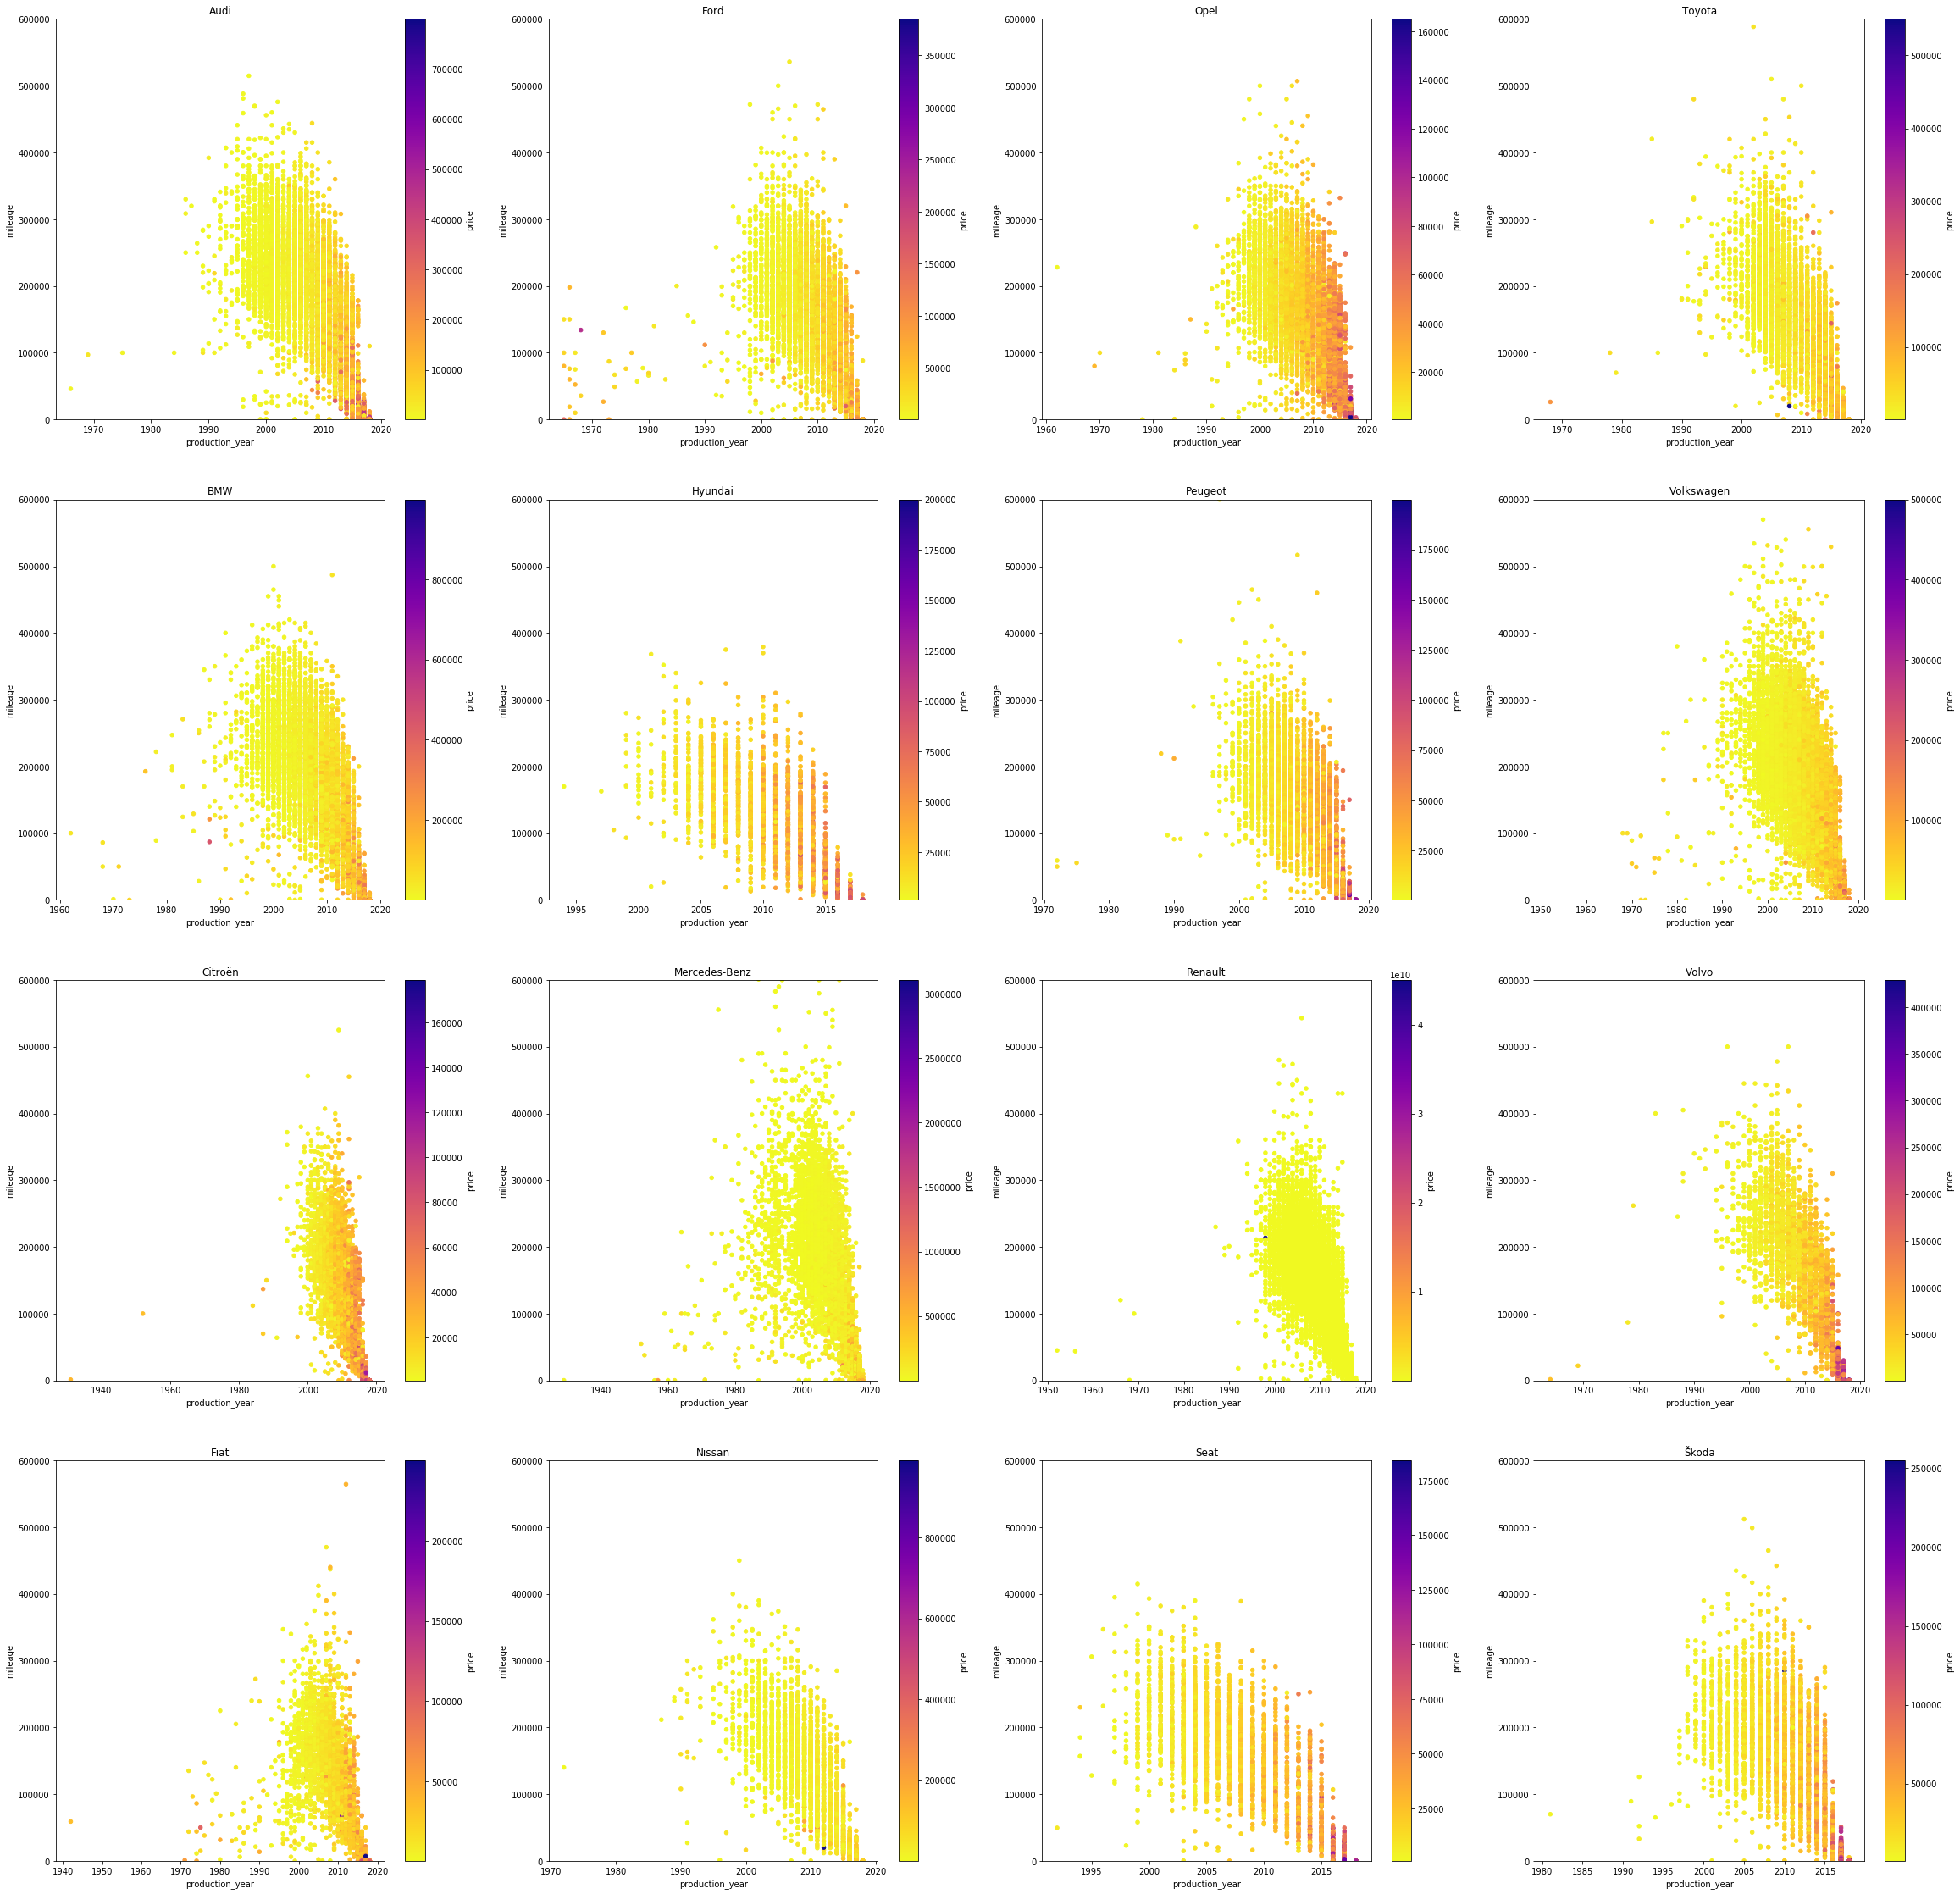

In [12]:
plt.viridis()
fig, axes = plt.subplots(
    nrows=4, 
    ncols=4, 
    figsize=(40, 40), 
    facecolor='w',
)
for index, (brand, brand_dataframe) in enumerate(final_dataframes.items()):
    ax = brand_dataframe.plot.scatter(
        x='production_year', 
        y='mileage', 
        c='price',
        cmap=plt.cm.plasma_r, 
        ax=axes[index % 4][index // 4],
    )
    ax.set_ylim([0, 6e5])
    ax.set_title(brand)
                
